In [1]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point
import missingno as msn
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
country3 = geopandas.read_file("data/PAK_adm3.shp")
country3 = country3[['NAME_3','geometry']]

unrest = pd.read_csv('data/2010-01-01-2019-07-20-Pakistan.csv')
unrest['event_date'] =  pd.to_datetime(unrest['event_date'], format='%d %B %Y')

unrest = unrest[unrest['year'] < 2019]
unrest['geometry'] = unrest[['longitude', 'latitude']].values.tolist()
del(unrest["latitude"], unrest["longitude"])
unrest['geometry'] = unrest['geometry'].apply(Point)
unrest = geopandas.GeoDataFrame(unrest, geometry='geometry')
unrest.crs = {"init": "epsg:4326"}

conflict = geopandas.tools.sjoin(unrest, country3, how="left")
conflict = conflict[['event_date','event_type','inter1','NAME_3','fatalities']]
conflict = conflict.reset_index()
del conflict['index']

conflict['Battles'] = conflict['event_type'] == 'Battles'
conflict['Explosions'] = conflict['event_type'] == 'Explosions/Remote violence'
conflict['Protests'] = conflict['event_type'] == 'Protests'
conflict['Riots'] = conflict['event_type'] == 'Riots'
conflict['Strategic developments'] = conflict['event_type'] == 'Strategic developments'
conflict['Violence against civilians'] = conflict['event_type'] == 'Violence against civilians'

conflict['state'] = conflict['inter1'] == 1
conflict['rebel'] = conflict['inter1'] == 2
conflict['political'] = conflict['inter1'] == 3
conflict['identity'] = conflict['inter1'] == 4
conflict['rioters'] = conflict['inter1'] == 5
conflict['protesters'] = conflict['inter1'] == 6
conflict['civilians'] = conflict['inter1'] == 7
conflict['external'] = conflict['inter1'] == 8

del conflict['event_type']
del conflict['inter1']

conflict['month_year'] = conflict.event_date.values.astype('datetime64[M]')
del conflict['event_date']
conflict_dist = conflict.groupby(['month_year','NAME_3']).sum()
conflict_dist = conflict_dist.reset_index()

conflict_dist = conflict_dist.merge(country3,on='NAME_3')
oct_2014 = conflict_dist[conflict_dist['month_year'] == '2014-10-01']
nov_2014 = conflict_dist[conflict_dist['month_year'] == '2014-11-01']
dec_2014 = conflict_dist[conflict_dist['month_year'] == '2014-12-01']

oct_2014 = geopandas.GeoDataFrame(oct_2014, geometry='geometry')
nov_2014 = geopandas.GeoDataFrame(nov_2014, geometry='geometry')
dec_2014 = geopandas.GeoDataFrame(dec_2014, geometry='geometry')

oct_2014['dummy'] = oct_2014['fatalities'] > 0
nov_2014['dummy'] = nov_2014['fatalities'] > 0
dec_2014['dummy'] = dec_2014['fatalities'] > 0

Text(0.5, 1.0, 'December 2014')

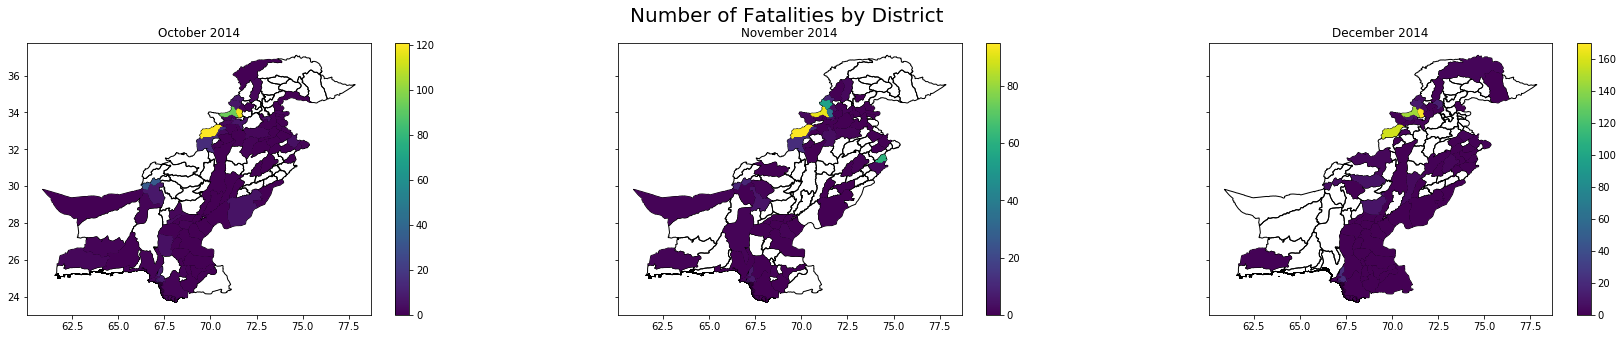

In [3]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(30,5))
fig.suptitle("Number of Fatalities by District", fontsize=20)

base = country3.plot(ax=ax[0], color='none', edgecolor='black')
oct_2014.plot(ax = base, column = 'fatalities', legend=True)
ax[0].set_title('October 2014', fontsize=12)

base = country3.plot(ax=ax[1], color='none', edgecolor='black')
nov_2014.plot(ax = base, column = 'fatalities', legend=True)
ax[1].set_title('November 2014', fontsize=12)

base = country3.plot(ax=ax[2], color='none', edgecolor='black')
dec_2014.plot(ax = base, column = 'fatalities', legend=True)
ax[2].set_title('December 2014', fontsize=12)

Text(0.5, 1.0, 'December 2014')

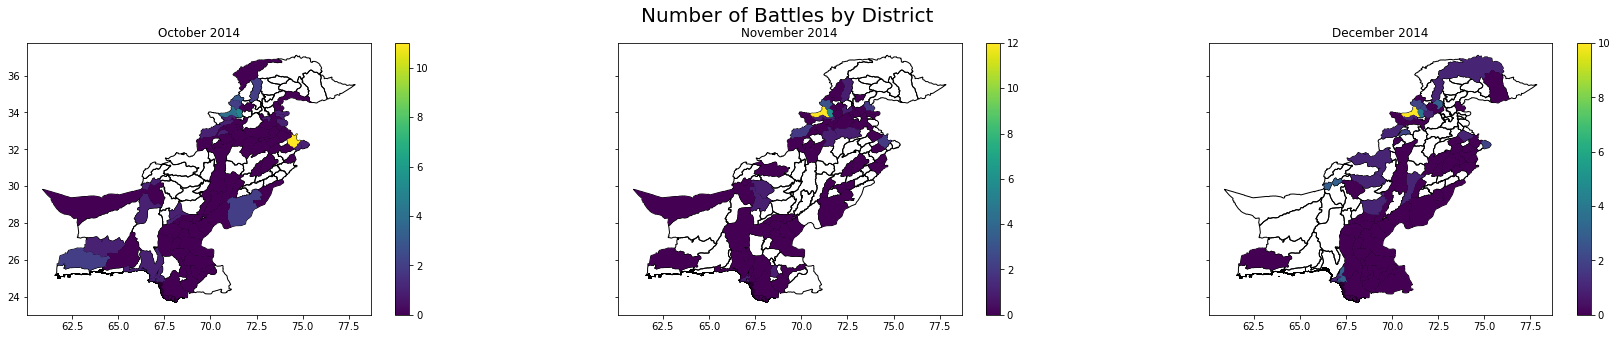

In [4]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(30,5))
fig.suptitle("Number of Battles by District", fontsize=20)

base = country3.plot(ax=ax[0], color='none', edgecolor='black')
oct_2014.plot(ax = base, column = 'Battles', legend=True)
ax[0].set_title('October 2014', fontsize=12)

base = country3.plot(ax=ax[1], color='none', edgecolor='black')
nov_2014.plot(ax = base, column = 'Battles', legend=True)
ax[1].set_title('November 2014', fontsize=12)

base = country3.plot(ax=ax[2], color='none', edgecolor='black')
dec_2014.plot(ax = base, column = 'Battles', legend=True)
ax[2].set_title('December 2014', fontsize=12)

Text(0.5, 1.0, 'December 2014')

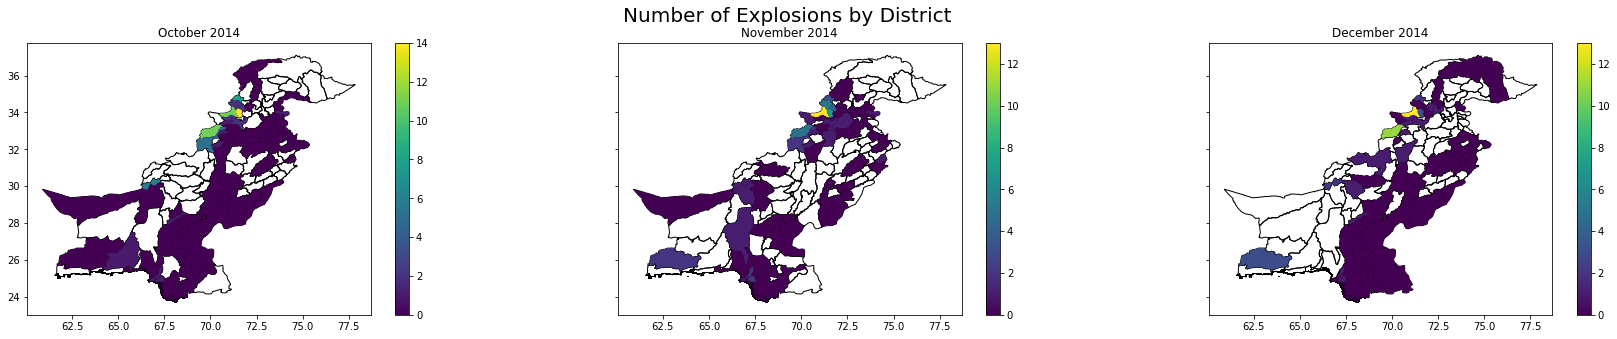

In [5]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(30,5))
fig.suptitle("Number of Explosions by District", fontsize=20)

base = country3.plot(ax=ax[0], color='none', edgecolor='black')
oct_2014.plot(ax = base, column = 'Explosions', legend=True)
ax[0].set_title('October 2014', fontsize=12)

base = country3.plot(ax=ax[1], color='none', edgecolor='black')
nov_2014.plot(ax = base, column = 'Explosions', legend=True)
ax[1].set_title('November 2014', fontsize=12)

base = country3.plot(ax=ax[2], color='none', edgecolor='black')
dec_2014.plot(ax = base, column = 'Explosions', legend=True)
ax[2].set_title('December 2014', fontsize=12)

Text(0.5, 1.0, 'December 2014')

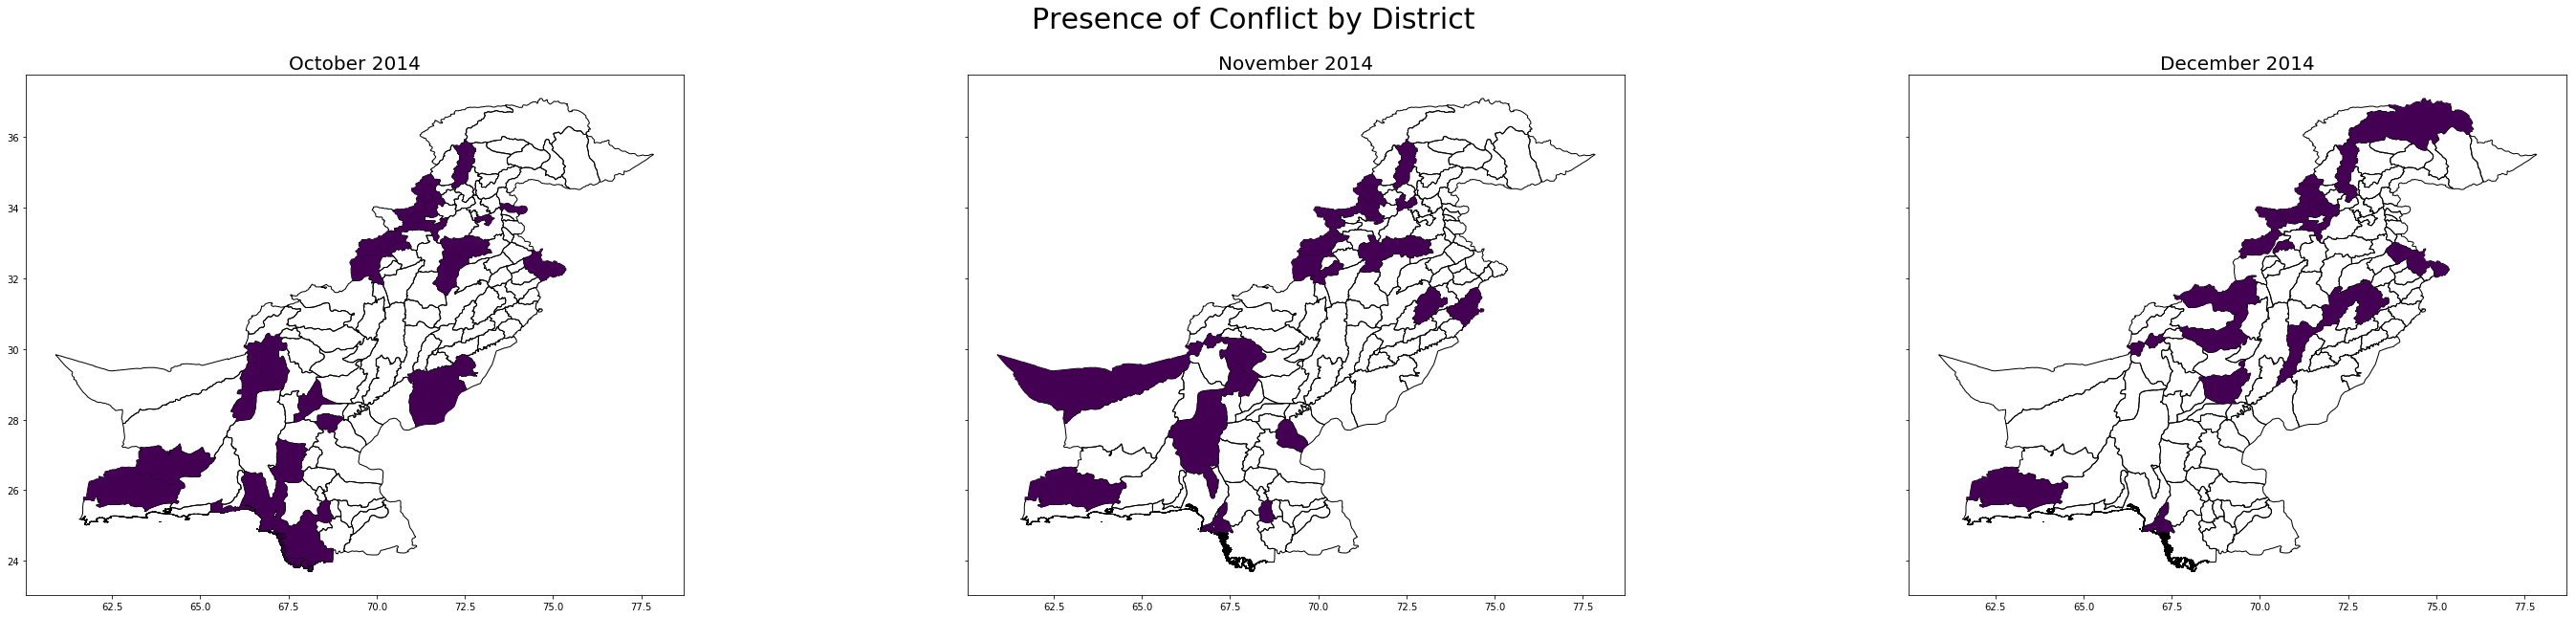

In [6]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(50,10))
fig.suptitle("Presence of Conflict by District", fontsize=30)

base = country3.plot(ax=ax[0], color='none', edgecolor='black')
oct_2014[oct_2014['dummy'] == 1].plot(ax = base, column = 'dummy')
ax[0].set_title('October 2014', fontsize=20)

base = country3.plot(ax=ax[1], color='none', edgecolor='black')
nov_2014[nov_2014['dummy'] == 1].plot(ax = base, column = 'dummy')
ax[1].set_title('November 2014', fontsize=20)

base = country3.plot(ax=ax[2], color='none', edgecolor='black')
dec_2014[dec_2014['dummy'] == 1].plot(ax = base, column = 'dummy')
ax[2].set_title('December 2014', fontsize=20)